In [1]:
import pickle
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from utils import get_dataset, jaccard_similarity_score, calc_label_corr

In [3]:
dataset_name = 'moral-dataset-MeToo'

In [4]:
X_train, X_test, y_train, y_test = get_dataset(dataset_name)

In [5]:
with open('training_size_bootstrap_{}.pkl'.format(dataset_name), 'rb') as f:
    data = pickle.load(f)

In [6]:
def get_data_df(model_name):
    x = defaultdict(list)
    d = data[model_name]
    for sample_num, sample in d.items():
        for f in sample.keys():
            y_pred = sample[f][0]
            x['{:.1f}'.format(f)].append(jaccard_similarity_score(y_test, y_pred))
    return pd.DataFrame(x)

In [7]:
x = get_data_df('cld')
y = get_data_df('powerset')

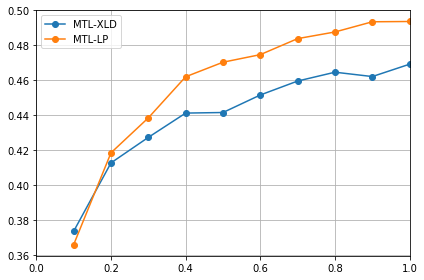

In [8]:
pd.DataFrame(index=map(lambda x: '{:.1f}'.format(x), np.arange(0.0, 1.1, 0.1)), 
             data={'cld': x.mean(), 'powerset': y.mean()}).rename(columns={'cld': 'MTL-XLD',
                                                                           'powerset': 'MTL-LP'}).plot(figsize=(6, 4), grid=True, marker='o')

plt.tight_layout()
plt.savefig('{}-learning-curve.jpg'.format(dataset_name), bbox_inches = "tight")

In [9]:
x.describe()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.373669,0.412777,0.427372,0.441267,0.441597,0.451626,0.459600,0.464654,0.462162,0.469249
std,0.010397,0.009800,0.012151,0.009164,0.009716,0.008868,0.007522,0.007182,0.008259,0.009066
min,0.353231,0.395615,0.409564,0.428769,0.426513,0.437436,0.445282,0.453026,0.448436,0.455051
25%,0.372186,0.408340,0.417718,0.435641,0.436615,0.445904,0.455833,0.461647,0.455641,0.464359
50%,0.374513,0.411423,0.427718,0.440269,0.440513,0.451590,0.459974,0.465564,0.465436,0.471359
75%,0.381205,0.416333,0.436244,0.443865,0.446212,0.456397,0.461692,0.469263,0.468423,0.473686
max,0.385949,0.431590,0.448641,0.456308,0.461231,0.468256,0.473821,0.475308,0.471949,0.482462


In [10]:
y.describe()

,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.366013,0.418551,0.438526,0.462044,0.470364,0.474705,0.483864,0.487667,0.493495,0.493662
std,0.021163,0.010777,0.017779,0.010152,0.011583,0.008656,0.009422,0.009175,0.008254,0.009819
min,0.341282,0.398974,0.414231,0.446462,0.447949,0.462179,0.465897,0.475897,0.481282,0.481667
25%,0.350256,0.413333,0.423013,0.456282,0.465417,0.467788,0.480769,0.481199,0.487545,0.486487
50%,0.359872,0.419872,0.443141,0.459295,0.472179,0.474397,0.483205,0.487577,0.492872,0.491538
75%,0.375994,0.427212,0.447019,0.470897,0.473596,0.482609,0.487160,0.491667,0.498654,0.498910
max,0.401410,0.431538,0.471410,0.476538,0.490256,0.485769,0.498205,0.504538,0.509487,0.509538
